# Exo 1

In [1]:
from math import sqrt, pi, cos, sin, acos, asin
from IPython.display import Image, display

## exo 1

In this quarter of circle,
We know the integer segments a and b

1) Find c

In [2]:
def length_c(a,b):
    """Compute c on the quarter circle.....
    @param a,b>0 : sides of a right triangle with a>=b"""
    h = sqrt(a**2 + b**2)
    alpha = acos(a/h)
    beta = pi - 2*alpha # angle at the center of the circle

    epsilon = 1e-12
    if abs(sin(beta)) < epsilon:
        return float('inf')
    r = b/sin(beta)     # radius
    c = sqrt((r-a)**2 + (r-b)**2)
    return c

2) Compute all integer solutions for c with : 0<a<b<30

In [3]:
epsilon = 1e-12  # tolérance pour les entiers

for a in range(1, 31) :
    for b in range(a, 31) :
        c = length_c(a,b)
        if abs(c - round(c)) < epsilon and c > 0:
            zero_sol = False
            print(f"a={a:2d}, b={b:2d} => c={c}")

a= 1, b= 7 => c=30.000000000000032
a= 2, b=14 => c=60.000000000000064
a= 3, b=21 => c=90.0000000000001
a= 4, b=28 => c=120.00000000000013


3) build at least one of the solutions

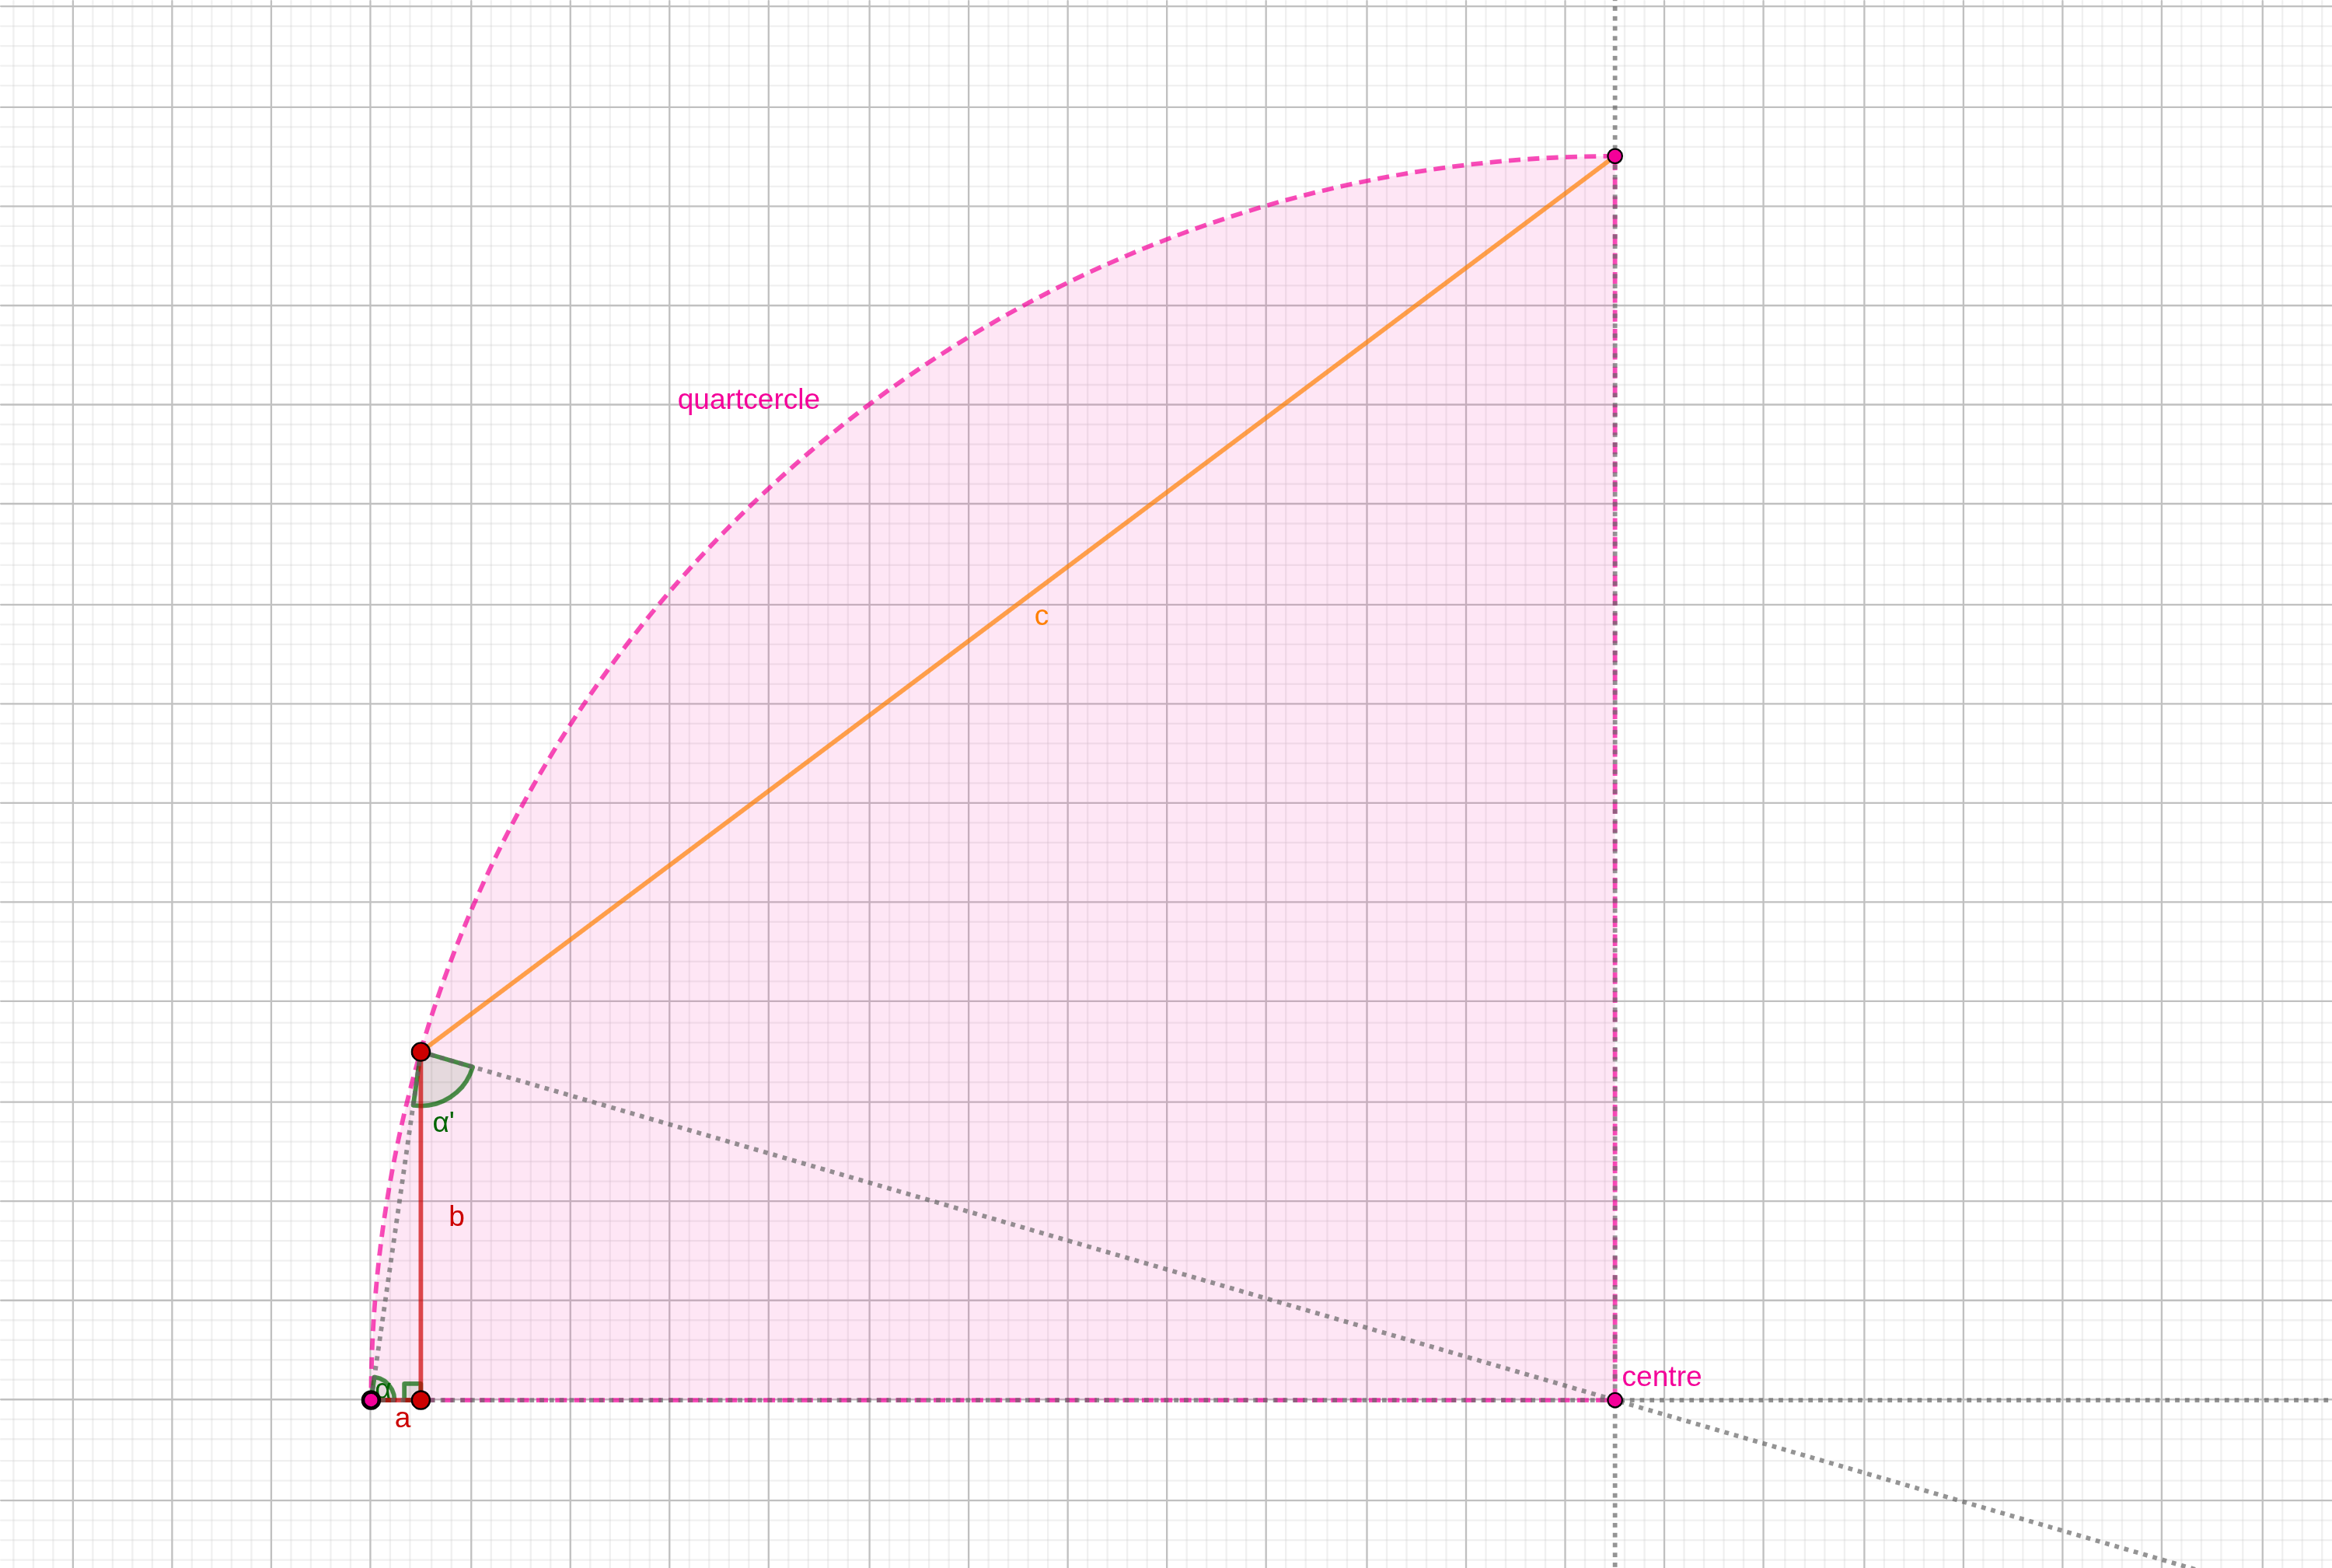

In [4]:
display(Image(filename="exo1.png", width=800, height=600))

## exo 2

A square is drawn inside the half-circle
In order to intersect the center of the half-circle,
and to be tangent both to the half circle
As well as the integer segment of
lenght a known.

1) Find the area of the square

In [ ]:
"""
-> Trouvons a en fonction de c

Grand triangle rectangle d'hypothénuse d (diamètre cercle) et de coté a :
    a = d * cos(alpha) <------------------------------------------------------------ [Trouvons d et alpha]
    d = 2 * radius
Carré :
    radius = c*sqrt(2) : Pythagore
donc
    d = 2*c*sqrt(2) <--------------------------------------------------------------- [d]

Petit triangle rectangle d'hypothénuse h (un bout de a), de coté c, et d'angle alpha en face de c :
    h = sqrt(radius**2 + c**2) = sqrt(2*c**2 + c**2) = sqrt(3)*c : Pythagore

    sin(alpha) = c/h
    alpha = asin(c/h) = asin(c/(sqrt(3)*c)) = asin(1/sqrt(3)) <--------------------- [alpha]

donc
    a = 2*c*sqrt(2)*cos(asin(1/sqrt(3)))

-> Finalement on a :
    c = a / (2*sqrt(2)*cos(asin(1/sqrt(3))))
    
    Aire = c**2 = (a / (2*sqrt(2)*cos(asin(1/sqrt(3)))))**2
"""

In [6]:
def area_square(a):
    """Let S be a semicircle. Compute the area of the square which is tangent to both the S and its center.
    @param a>0: the segment from an extremity of S (the side where the square is not) to the arc of S, tangent to the square...."""
    alpha = asin(1/sqrt(3))
    c = a / (2*sqrt(2)*cos(alpha))
    return c**2


In [7]:
epsilon = 1e-12

for a in range(1, 31):
    A = area_square(a)
    if abs(A - round(A)) < epsilon:
        print(f"a={a:2d} => A={A}")

a= 4 => A=3.0000000000000004
a= 8 => A=12.000000000000002
a=12 => A=27.0
a=16 => A=48.00000000000001
a=20 => A=75.00000000000001
a=24 => A=108.0
a=28 => A=147.00000000000003


## exo 3

Triangle (a,b,c) is Heronian with c⩽b⩽a

1) Find the radius d of the half-circle
Which diameter is on side a
And which is tangent to b and c.

In [8]:
def radius(a,b,c) :
    """Compute the radius of the inscribe semicircle with its diameter on a
    @param a,b,c : sides of the triangle with a>=b>=c>0"""

    # the center of the semicircle is the intersection of a and the bisector of the angle at the opposite of a
    a1 = a*c/(b+c) # b/c = (a-a1)/d : theorem of the bisector (a1 if the part between the center and the corner of the semicircle)

    beta = acos((a**2 + c**2 - b**2)/(2*a*c)) # cos(beta) = (a^2 + c^2 - b^2)/(2*a*c) : theorem of cosines

    max(-1.0, min(1.0, beta))
    return a1*sin(beta)

2) Compute all integer solutions for c with : 1⩽d⩽90

In [9]:
epsilon = 1e-12  # tolérance pour les entiers

for a in range(1, 91) :
    for b in range(1, a+1) :
        for c in range(max(1,a-b), b+1) :
            r = radius(a,b,c)
            if abs(r - round(r)) < epsilon and r > 0:
                print(f"a={a:2d}, b={b:2d}, c={c:2d} => r={r}")

a=28, b=25, c=17 => r=10.0
a=30, b=25, c=25 => r=12.0


a=35, b=28, c=21 => r=12.0
a=40, b=25, c=25 => r=11.999999999999996
a=40, b=26, c=22 => r=10.999999999999996
a=56, b=50, c=34 => r=20.0
a=60, b=50, c=50 => r=24.0
a=66, b=53, c=35 => r=21.0
a=70, b=56, c=42 => r=24.0
a=80, b=50, c=50 => r=23.999999999999993
a=80, b=52, c=44 => r=21.999999999999993
a=84, b=75, c=51 => r=30.0
a=90, b=75, c=33 => r=22.0
a=90, b=75, c=75 => r=36.0



3) build at least one of the solutions

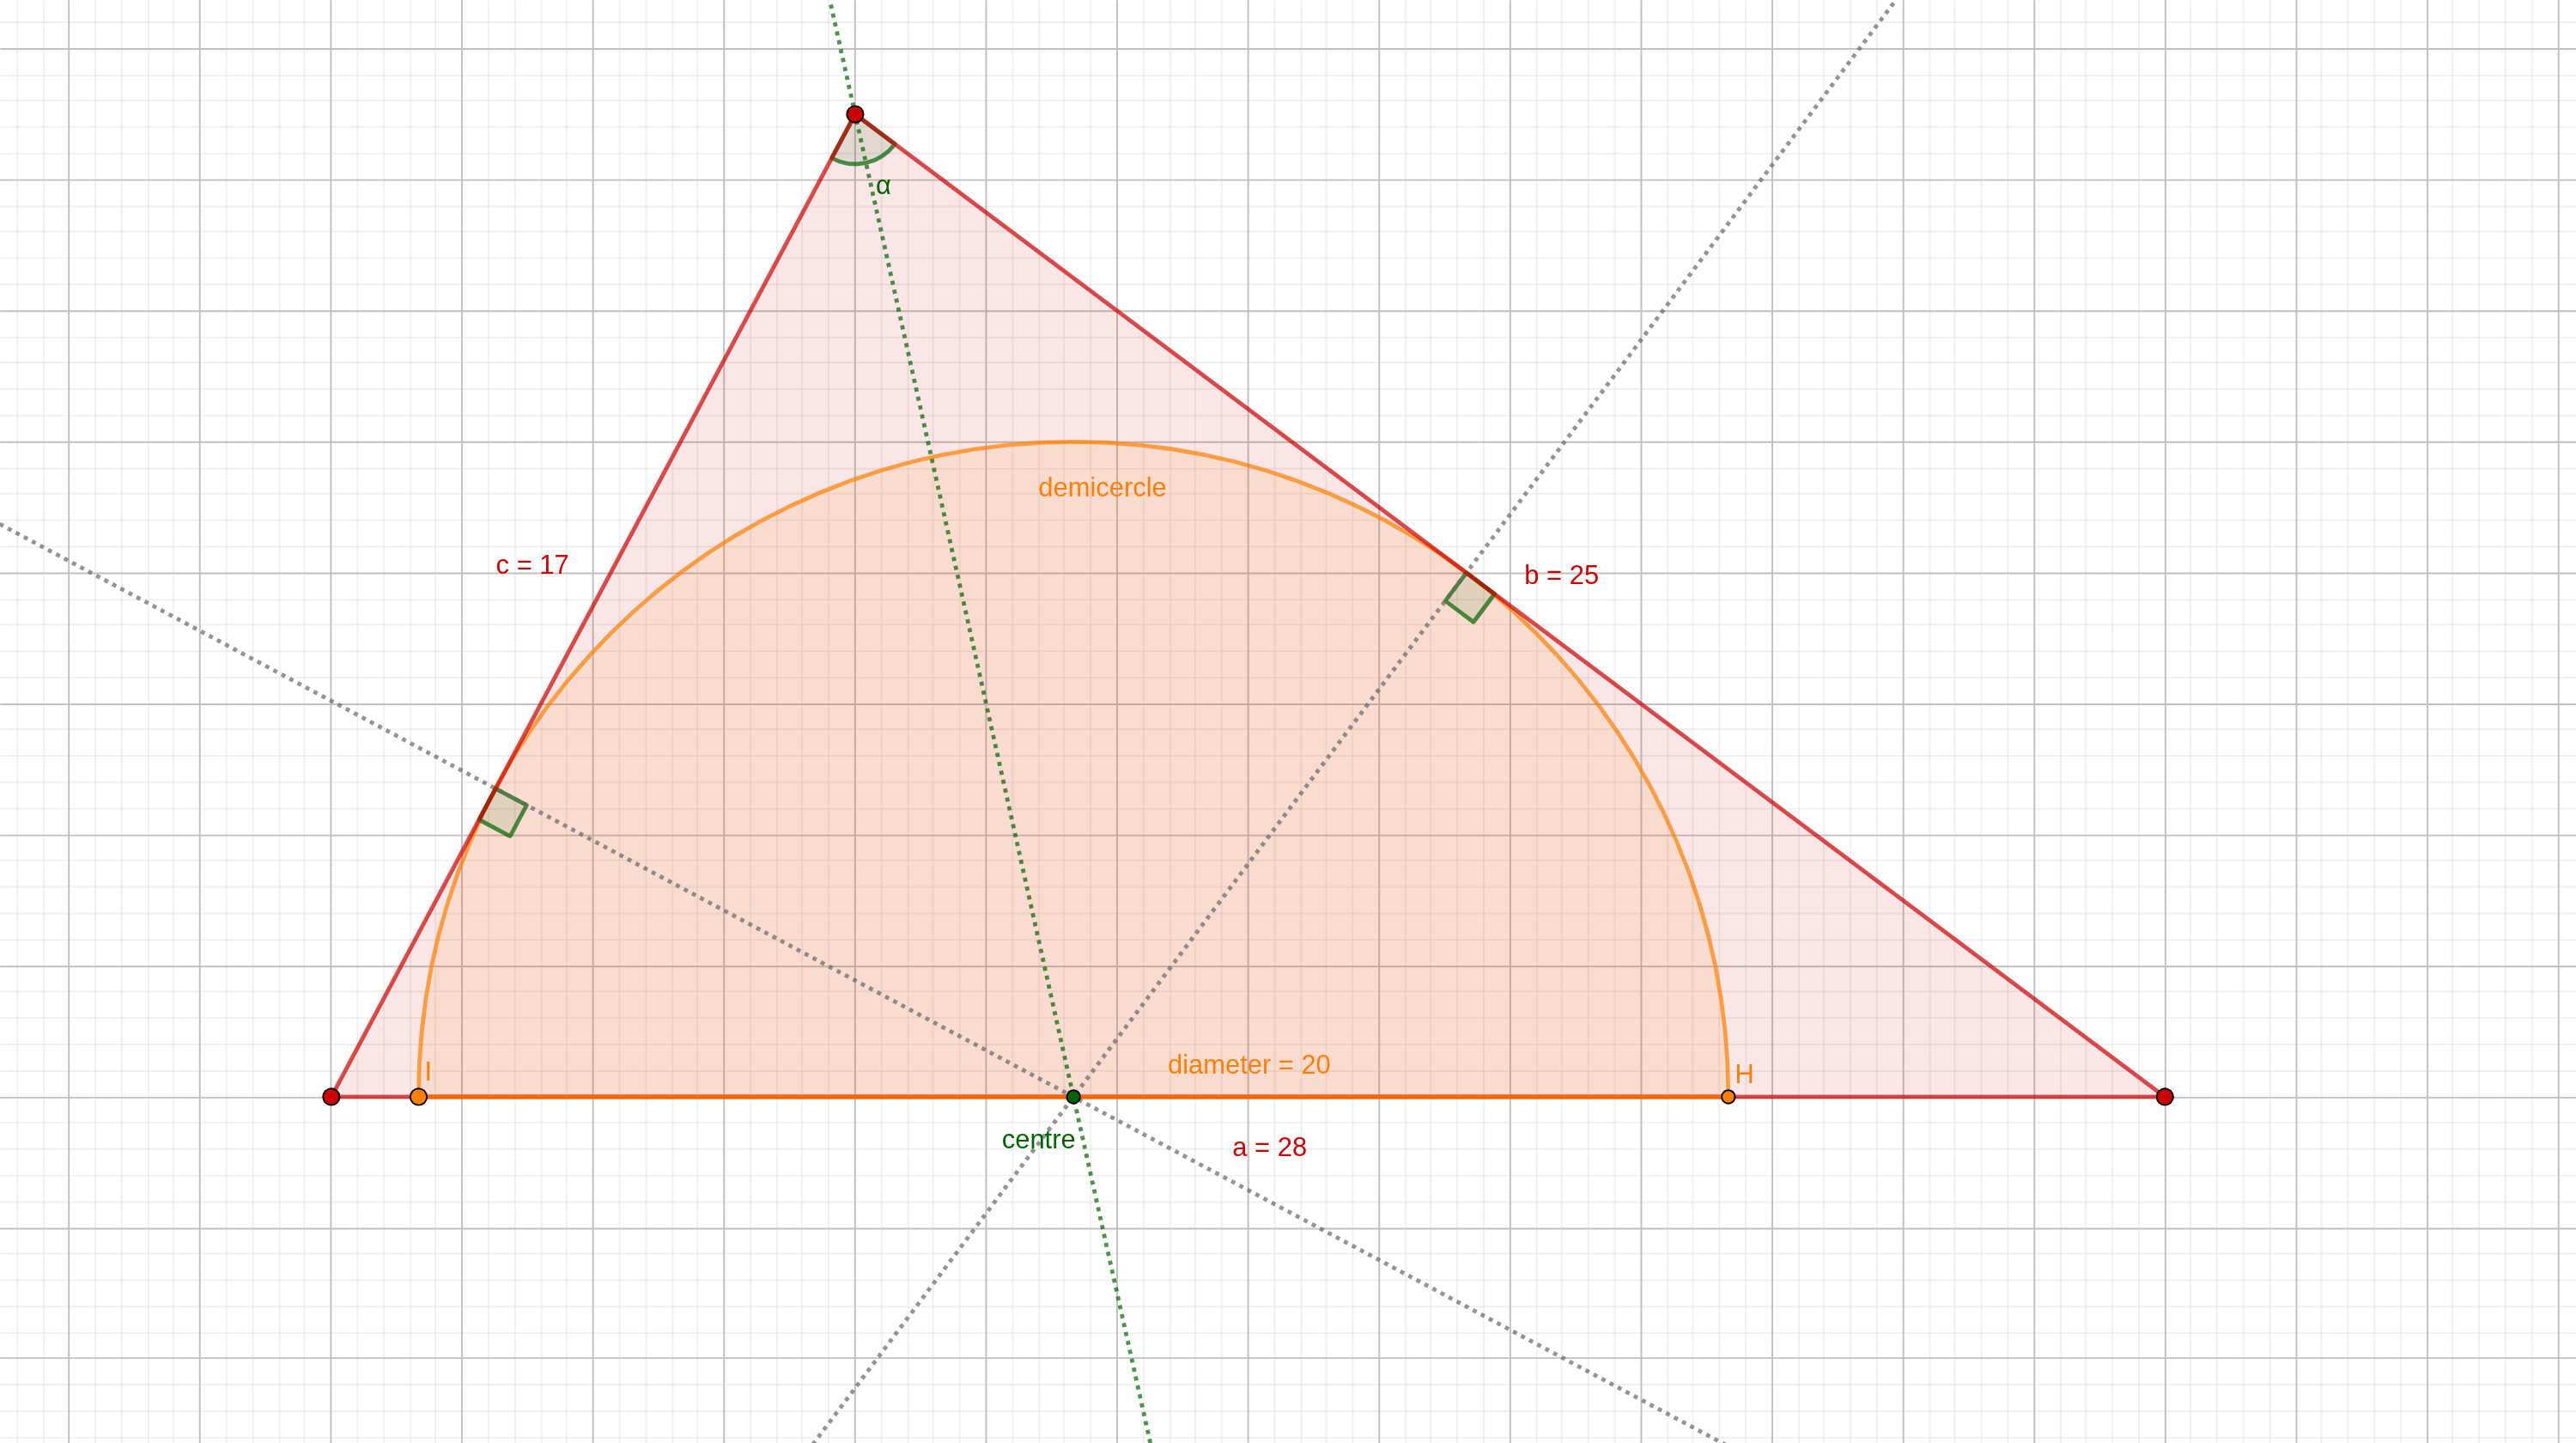

In [10]:
display(Image(filename="exo3.png", width=800, height=600))

## exo 4

On this figure, we get the intersection of twice the same
Rectangle triangle with 2 sides are
Integer and known a and b.

1) Find the area of the 3 parts

In [11]:
def area_triangles(a,b) :
    """Compute the 3 areas corresponding to the intersection of twice the same right-triangle etc etc
    @param a,b : sides of the triangle with a,b>0, and a is the hypotenuse"""
    c = sqrt(a**2 - b**2)
    A = 1/2*c*b
    alpha = acos(b/a)
    beta = asin(b/a)
    theta = pi/2 - beta
    delta = pi - (alpha + theta)

    A1 = 1/2 * b**2 * sin(theta) * sin(alpha) / sin(delta)
    A2 = A - A1
    A3 = A1
    return A, A1, A2, A3

2) Compute all integer solutions for 0<b<a<30


In [12]:
epsilon = 1e-12  # tolérance pour les entiers

for a in range(1, 31) :
    for b in range(1, a) :
        A, A1, A2, A3 = area_triangles(a,b)
        if abs(A - round(A)) < epsilon and A > 0:
            print(f"a={a:2d}, b={b:2d} => A={A}, A1={A1:.1f}, A2={A2:.1f}, A3={A3:.1f}")

a= 5, b= 3 => A=6.0, A1=3.0, A2=3.0, A3=3.0
a= 5, b= 4 => A=6.0, A1=3.0, A2=3.0, A3=3.0
a=10, b= 6 => A=24.0, A1=12.0, A2=12.0, A3=12.0
a=10, b= 8 => A=24.0, A1=12.0, A2=12.0, A3=12.0
a=13, b= 5 => A=30.0, A1=15.0, A2=15.0, A3=15.0
a=13, b=12 => A=30.0, A1=15.0, A2=15.0, A3=15.0
a=15, b= 9 => A=54.0, A1=27.0, A2=27.0, A3=27.0
a=15, b=12 => A=54.0, A1=27.0, A2=27.0, A3=27.0
a=17, b= 8 => A=60.0, A1=30.0, A2=30.0, A3=30.0
a=17, b=15 => A=60.0, A1=30.0, A2=30.0, A3=30.0
a=20, b=12 => A=96.0, A1=48.0, A2=48.0, A3=48.0
a=20, b=16 => A=96.0, A1=48.0, A2=48.0, A3=48.0
a=25, b= 7 => A=84.0, A1=42.0, A2=42.0, A3=42.0
a=25, b=15 => A=150.0, A1=75.0, A2=75.0, A3=75.0
a=25, b=20 => A=150.0, A1=75.0, A2=75.0, A3=75.0
a=25, b=24 => A=84.0, A1=42.0, A2=42.0, A3=42.0
a=26, b=10 => A=120.0, A1=60.0, A2=60.0, A3=60.0
a=26, b=24 => A=120.0, A1=60.0, A2=60.0, A3=60.0
a=29, b=20 => A=210.0, A1=105.0, A2=105.0, A3=105.0
a=29, b=21 => A=210.0, A1=105.0, A2=105.0, A3=105.0
a=30, b=18 => A=216.0, A1=108.0, A2=

3) build at least one of the solutions

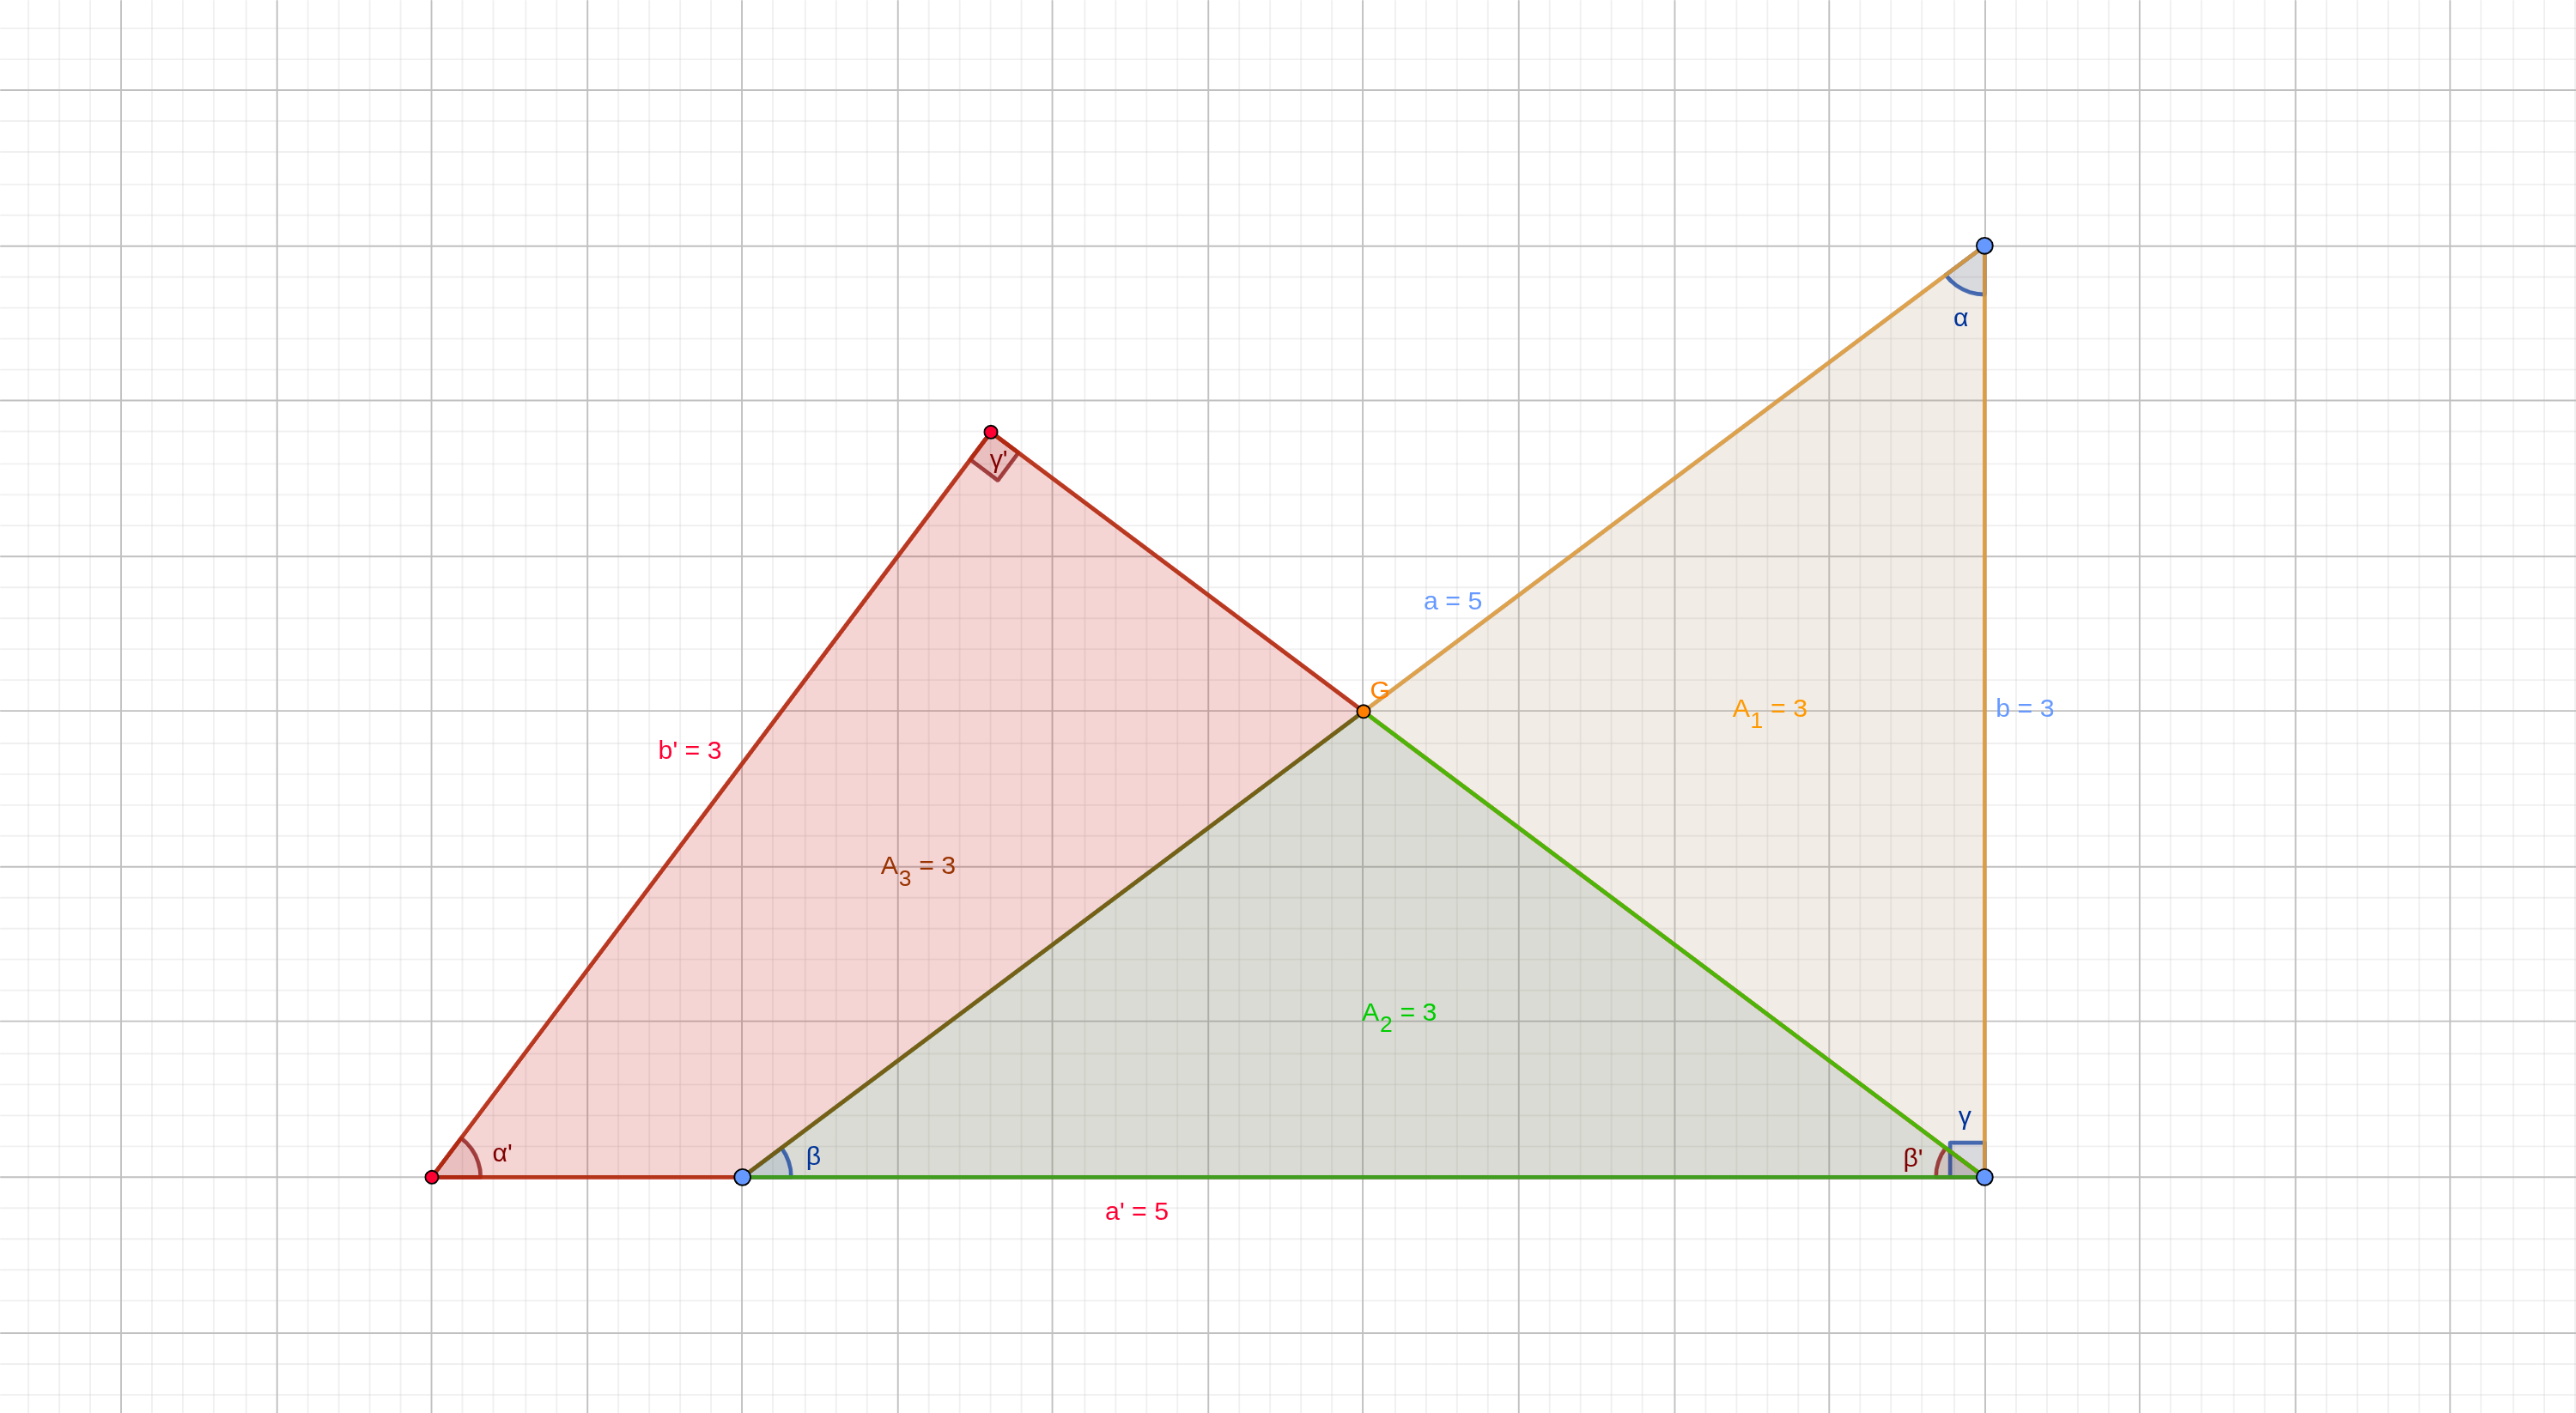

In [13]:
display(Image(filename="exo4.png", width=800, height=600))